# **Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#to ignore any warnings generated

In [ ]:
Heart_df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
Heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
Heart_df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
print(f"The dataset has {Heart_df.shape[0]} rows and {Heart_df.shape[1]} columns.")

The dataset has 918 rows and 12 columns.


In [ ]:
print(f"My Regression Target is\nHeartDisease\n")
Heart_df.iloc[2:10,11]

My Regression Target is
HeartDisease



,HeartDisease
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [ ]:
def get_HeartDisease_value_count(val):
  mask = Heart_df['HeartDisease'] == val
  return Heart_df[mask].shape[0]

print("Total 1 data",get_HeartDisease_value_count(1))
print("Total 0 data",get_HeartDisease_value_count(0))

Total 1 data 508
Total 0 data 410


In [ ]:
dataset_cols = Heart_df.columns
print("Columns: ",dataset_cols)

Columns:  Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [ ]:
print("\nMissing Values:")
print(Heart_df.isnull().sum())


Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
print("\nDataset Info:")

print(Heart_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [ ]:
duplicates = Heart_df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}\n")

Number of Duplicate Rows: 0



In [ ]:
numericCol=Heart_df.select_dtypes(exclude="object");
categoricalCol=Heart_df.select_dtypes(include="object");

In [ ]:
numericCol.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
print("The descriptive summary for the target column")
print(categoricalCol.describe())

The descriptive summary for the target column
        Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460


EDA

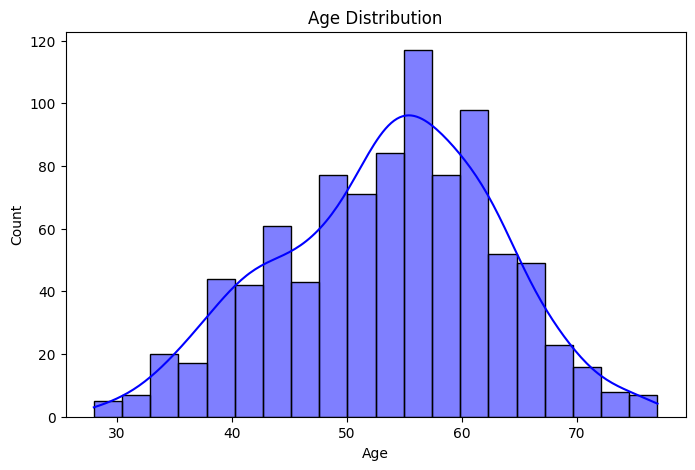

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(Heart_df["Age"], bins=20, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

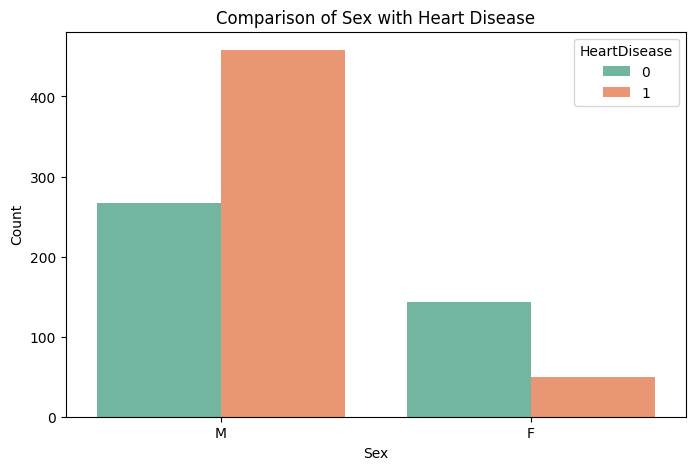

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex", hue="HeartDisease", data=Heart_df, palette="Set2")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Comparison of Sex with Heart Disease")
plt.show()

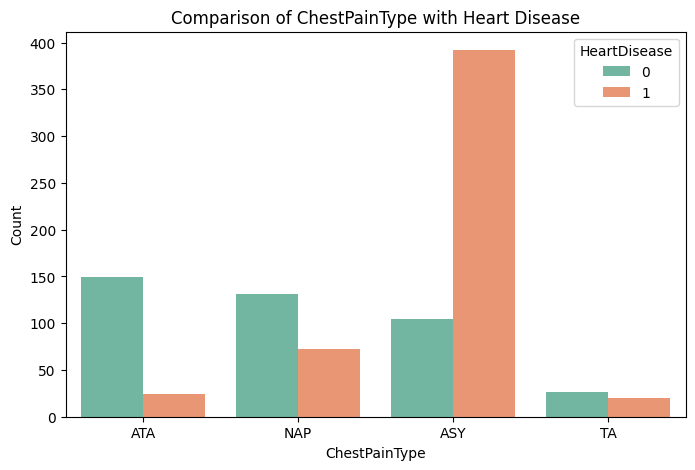

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="ChestPainType", hue="HeartDisease", data=Heart_df, palette="Set2")
plt.xlabel("ChestPainType")
plt.ylabel("Count")
plt.title("Comparison of ChestPainType with Heart Disease")
plt.show()

Model Processing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical variables

for col in categoricalCol:
    Heart_df[col] = encoder.fit_transform(Heart_df[col].astype(str))

# Preview the dataset after encoding
print("Dataset after encoding:")
Heart_df.head()

Dataset after encoding:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


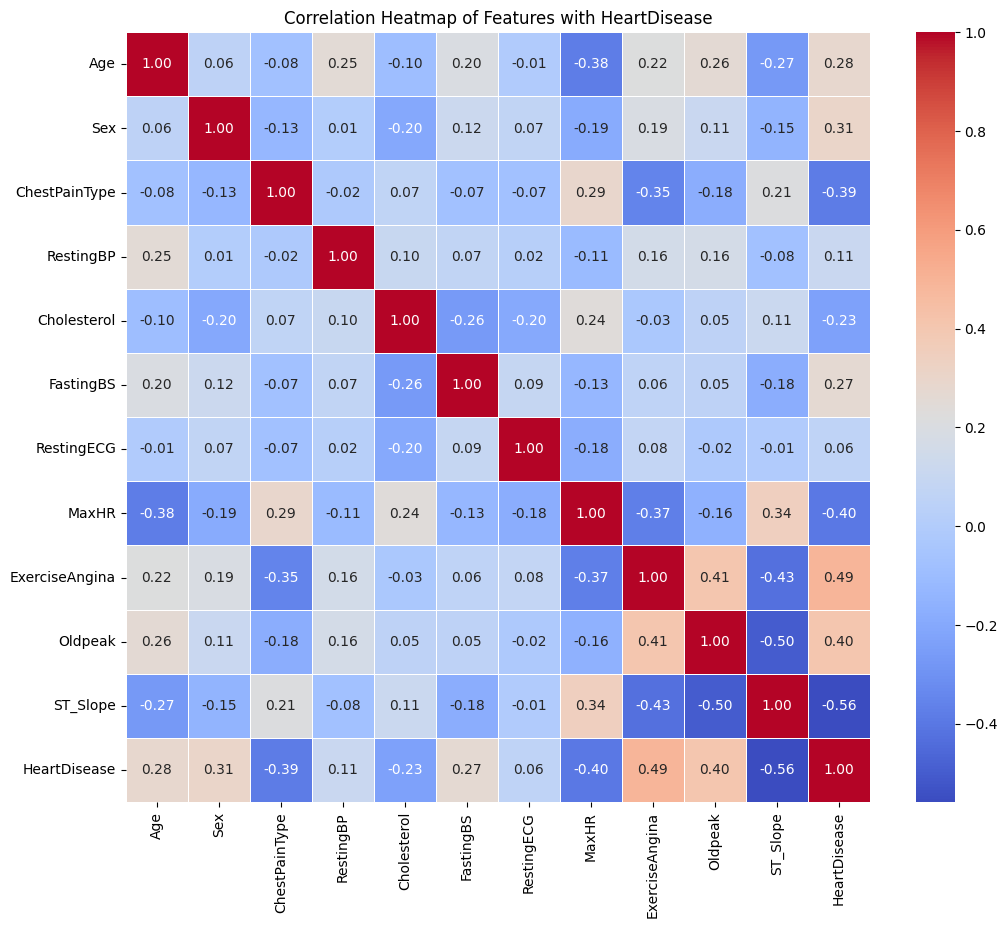

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(Heart_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Features with HeartDisease")
plt.show()


In [ ]:
X = Heart_df.drop(columns=['HeartDisease'])
y = Heart_df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
yTrain_pred_rf = rf_model.predict(X_train)
yTest_pred_rf = rf_model.predict(X_test)


In [ ]:
accuracy_train_rf = accuracy_score(y_train, yTrain_pred_rf)
print(f"Random Forest Accuracy on training set : {accuracy_train_rf*100:.3f}%")

accuracy_test_rf = accuracy_score(y_test, yTest_pred_rf)
print(f"Random Forest Accuracy on test set : {accuracy_test_rf:.3f}%")

Random Forest Accuracy on training set : 100.000%
Random Forest Accuracy on test set : 0.895%


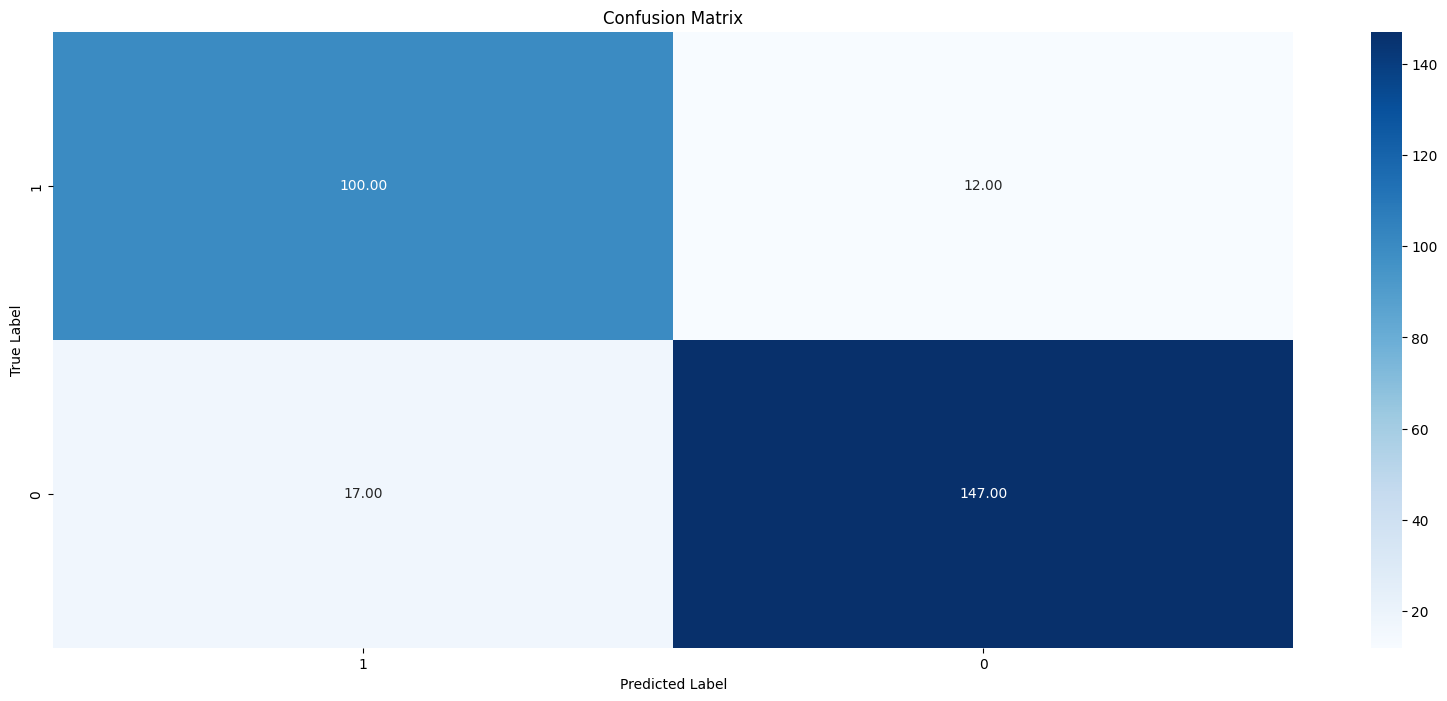

In [ ]:
confusion_matrix_rf=confusion_matrix(y_test,yTest_pred_rf)
labels = [1,0]
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix_rf, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report_rf=classification_report(y_test,yTest_pred_rf)
print("The initial classification report using Random Forest:\n")
print(class_report_rf)

The initial classification report using Random Forest:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.92      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.90       276



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)




In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
print(f"Gradient Boosting Accuracy on training set : {accuracy_train_gb*100:.3f}%")
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)
print(f"Gradient Boosting Accuracy on test set: {accuracy_test_gb*100:.3f}%")

Gradient Boosting Accuracy on training set : 94.860%
Gradient Boosting Accuracy on test set: 85.870%


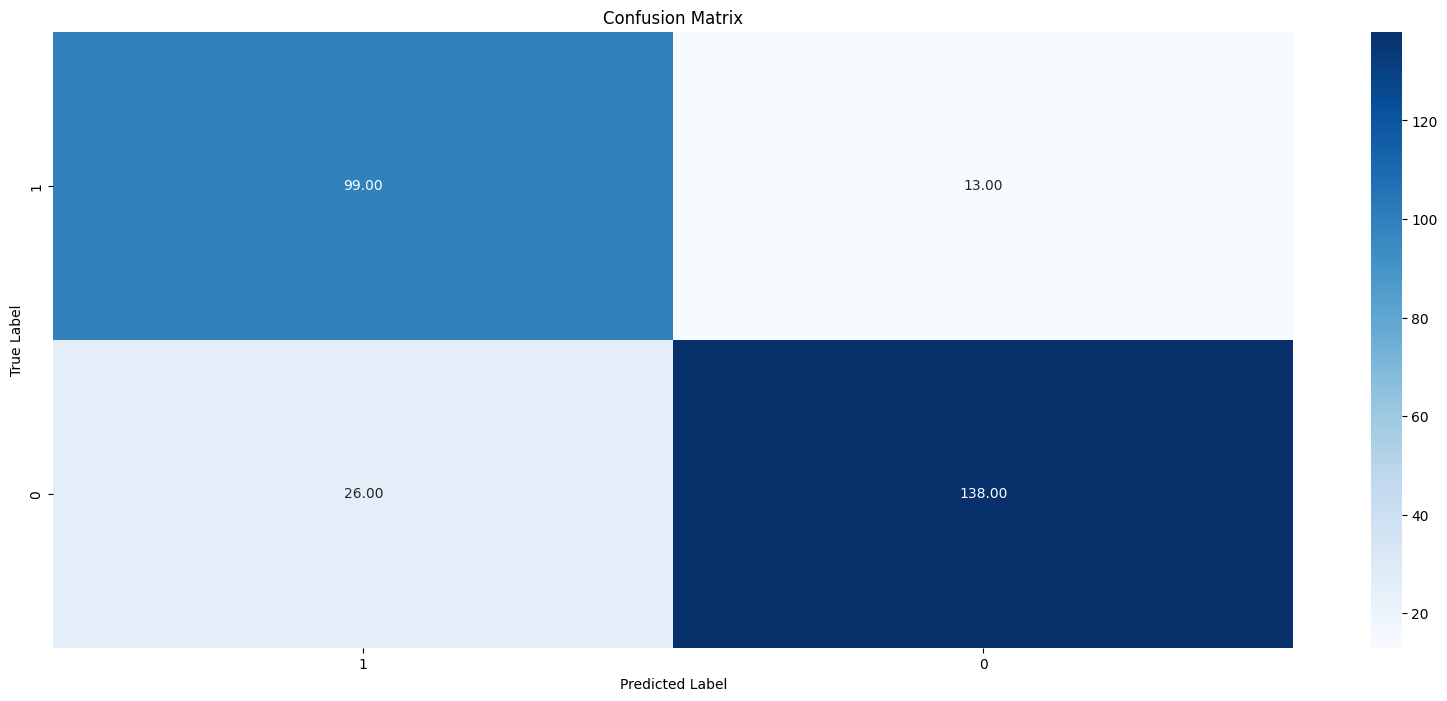

In [ ]:
confusion_matrix_rf=confusion_matrix(y_test,y_pred_test_gb)
labels = [1,0]
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix_rf, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report_gb=classification_report(y_test,y_pred_test_gb)

print("The initial classification report using RFC:\n")
print(class_report_gb)

The initial classification report using RFC:

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       112
           1       0.91      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



## **Feature Selection and HyperParameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_param=grid_rf.best_params_
print("Best Random Forest Parameters:",best_param)

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
final_rf_model = SelectFromModel(rf_model, prefit=True)
X_new = final_rf_model.transform(X)
print(X.shape)

(918, 11)


In [ ]:
X_new.shape

(918, 6)

### New training and testing sets after feature selection (RFC)

In [ ]:
x_train_v1,x_test_v1,y_train_v1,y_test_v1=train_test_split(X_new,y,test_size=0.2,random_state=42)

In [ ]:
final_rfc=RandomForestClassifier(**best_param,random_state=42)
final_rfc.fit(x_train_v1,y_train_v1)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
yTrain_predF=final_rfc.predict(x_train_v1)
yTest_predF=final_rfc.predict(x_test_v1)

In [ ]:
accTrain_rfc_final=accuracy_score(y_train_v1,yTrain_predF)
print(f"Accuracy on training set : {accTrain_rfc_final*100:.3f} %")

accTest_rfc_final=accuracy_score(y_test_v1,yTest_predF)
print(f"Accuracy on test set : {accTest_rfc_final*100:.3f} %")

Accuracy on training set : 96.730 %
Accuracy on test set : 88.043 %


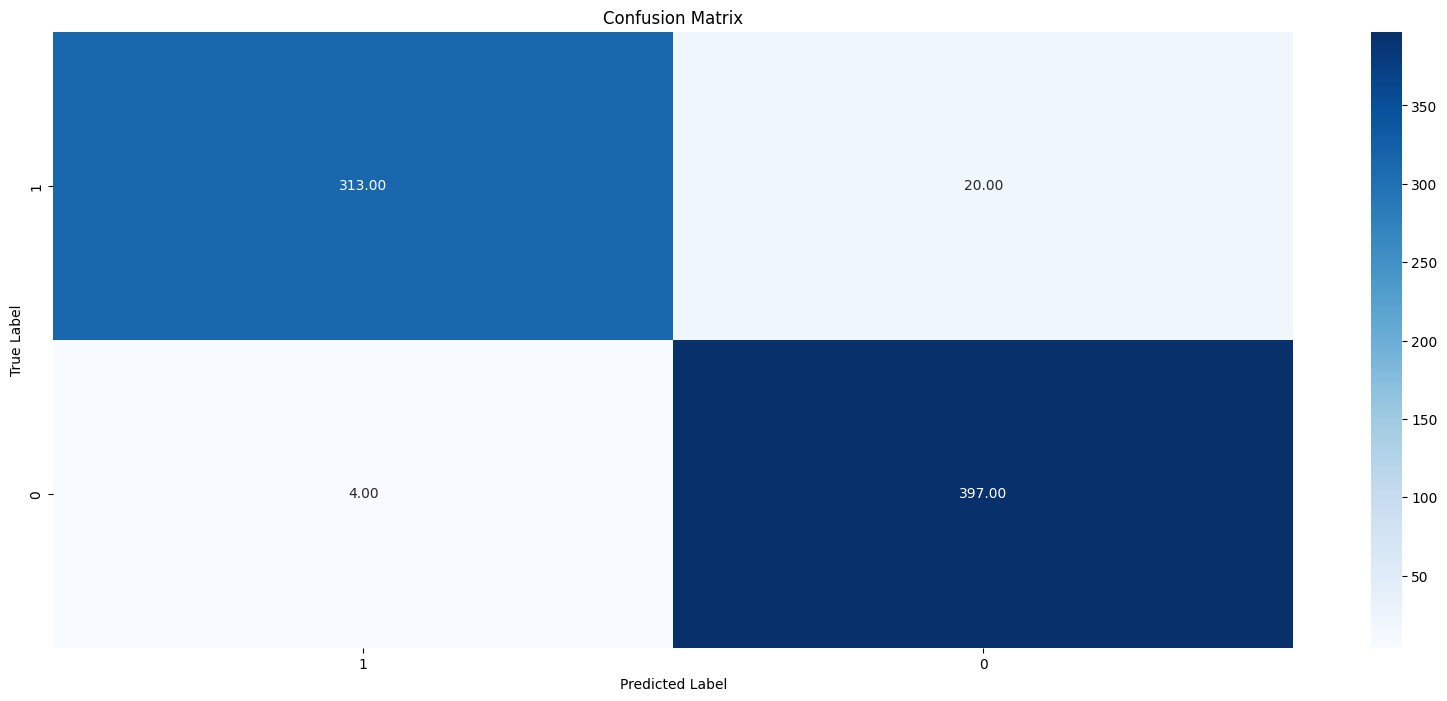

In [ ]:
confusion_matrix_rf=confusion_matrix(y_train_v1,yTrain_predF)
labels = [1,0]
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix_rf, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report_rfc_final=classification_report(y_test_v1,yTest_predF)

print("The final classification report using RFC:\n")
print(class_report_rfc_final)

The final classification report using RFC:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Feature Selection for Gradient Boosting

In [ ]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
gb_best_param = grid_gb.best_params_
print("Best Gradient Boosting Parameters:",gb_best_param)

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
from sklearn.feature_selection import SelectFromModel

# Fit the model using the training data
feature_selector_gb = SelectFromModel(gb_model, threshold='median')
feature_selector_gb.fit(X_train, y_train)

# Get the selected feature names
selected_features_gb = X_train.columns[feature_selector_gb.get_support()]
print("Selected Features for Gradient Boosting:", list(selected_features_gb))

# Transform the dataset
X_train_selected_gb = feature_selector_gb.transform(X_train)
X_test_selected_gb = feature_selector_gb.transform(X_test)


Selected Features for Gradient Boosting: ['ChestPainType', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [ ]:
# Train the optimized Gradient Boosting model with selected features
best_gb_model = GradientBoostingClassifier(**gb_best_param, random_state=42)
best_gb_model.fit(X_train_selected_gb, y_train)

# Make predictions
y_pred_gb_selected = best_gb_model.predict(X_test_selected_gb)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

accuracy_gb_selected = accuracy_score(y_test, y_pred_gb_selected)
print(f"Gradient Boosting Accuracy after Feature Selection: {accuracy_gb_selected:.2f}")

# Detailed classification report
print("Classification Report after Feature Selection:")
print(classification_report(y_test, y_pred_gb_selected))


Gradient Boosting Accuracy after Feature Selection: 0.82
Classification Report after Feature Selection:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       112
           1       0.90      0.79      0.84       164

    accuracy                           0.82       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.84      0.82      0.82       276

